## Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

## Содержание:
* [Шаг 1. Общая информация](#first-bullet)
* [Шаг 2. Предобработка данных](#second-bullet)
* 2.1. [Обработка дубликатов](#second-1-bullet)
* 2.2. [Обработка пропусков](#second-2-bullet)
* 2.3. [Замена типов данных](#second-3-bullet)
* 2.4. [Лемматизация](#second-4-bullet)
* 2.5. [Категоризация данных](#second-5-bullet)
* [Шаг 3. Исследовательский анализ данных](#third-bullet)
* 3.1.[Есть ли зависимость между наличием детей и возвратом кредита в срок](#third-1-bullet)
* 3.2. [Есть ли зависимость между семейным положением и возвратом кредита в срок?](#third-2-bullet)
* 3.3. [Есть ли зависимость между уровнем дохода и возвратом кредита в срок](#third-3-bullet)
* 3.4. [Как разные цели кредита влияют на его возврат в срок](#third-4-bullet)
* [Шаг 4. Общий вывод](#thourth-bullet)


### Шаг 1. Общая информация<a class="anchor" id="first-bullet"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('/datasets/data.csv')

In [3]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


**Описание данных:**

* children — количество детей в семье
* days_employed — общий трудовой стаж в днях
* dob_years — возраст клиента в годах
* education — уровень образования клиента
* education_id — идентификатор уровня образования
* family_status — семейное положение
* family_status_id — идентификатор семейного положения
* gender — пол клиента
* income_type — тип занятости
* debt — имел ли задолженность по возврату кредитов
* total_income — ежемесячный доход
* purpose — цель получения кредита

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


    Всего в таблице 12 колонок, 21525 строк.
    В двух колонках ['days_employed'] и ['total_income'] имеются пропущенные значения NaN. 
    Отсутствуют числа в ячейках, тип данных float.
    Необходимо исключить пропуски.
    Rолонка 'days_employed' - не нужна для решения поставленных задач.
    Колонка 'total_income' - нужна для решения задач

### Шаг 2. Предобработка данных<a class="anchor" id="second-bullet"></a>

### 2.1. Обработка дубликатов<a class="anchor" id="second-1-bullet"></a>

In [5]:
df.duplicated().sum()

54

В датасете 21525 строк, из них 54 строки - это полные дубликаты. Дубликаты составляют 0,25% от датасета. Удалим дублирующиеся строки.

In [6]:
df.drop_duplicates().reset_index(drop = True)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21466,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21467,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21468,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21469,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля


In [7]:
df['education'].value_counts()

среднее                13750
высшее                  4718
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   274
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
УЧЕНАЯ СТЕПЕНЬ             1
Ученая степень             1
Name: education, dtype: int64

    В результате работы метода value_counts() были обнаружены дубликаты в колонке ['education'].
    Уникальных значений 5 шт., но из-за отличий в регистре, в таблице 15 значений. 
    Приведем все значения к нижнему регистру

In [8]:
df['education'] = df['education'].str.lower()
df['education'].value_counts()

среднее                15233
высшее                  5260
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64

    Чтобы избавится от дубликатов, все символы в строке привела к нижнему регистру
    вызовом метода lower(). Чтобы убедится в отсутсвии дубликатов, был вызван повторно
    метод value_counts(). Дубликаты могли появится вследствии человеческого фактора,
    когда вносилось информация без учета регистра.
    В других колонках дубликаты не обнаружены.
  

### 2.2. Обработка пропусков<a class="anchor" id="second-2-bullet"></a>

    В колонке ['total_income'] были обнаружены пропуски.
    Изучим данные в колонке, чтобы принять решение о корректном заполнении пропусков.

In [9]:
df['total_income'].describe().round(2)

count      19351.00
mean      167422.30
std       102971.57
min        20667.26
25%       103053.15
50%       145017.94
75%       203435.07
max      2265604.03
Name: total_income, dtype: float64

    Средний ежемесячный доход клиентов банка - 167 422 рублей.
    у 25% клиентов ежемесячный доход составляет - 103 053 рубля.
    У 50% клиентов ежемесячный доход не превышает - 145 017 рублей.
    у 75 % клиентов ежемесячный доход не превышает - 203 435 рублей.
    Самый большой выброс в данных - доход в 2 265 604 рубля в месяц.
    Стандартное отклонение - 102971.57
    Так как стандартное отклонение велико, в наборе данных могут быть серьёзные аномалии
    или выбросы.


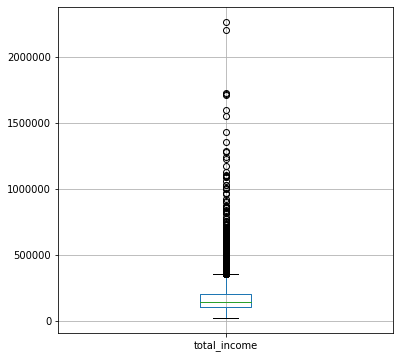

In [10]:
df.boxplot(column='total_income', figsize=(6,6))

(0, 355000)

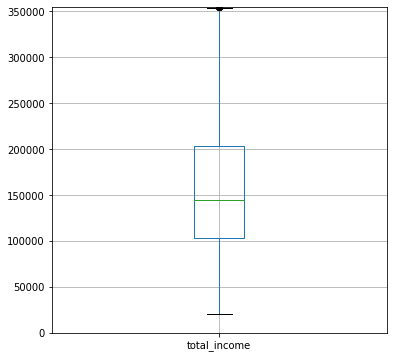

In [11]:
df.boxplot(column='total_income', figsize=(6,6))
plt.ylim(0, 355000)

    Выбросы начинаются от дохода 355000 рублей в месяц.
    Удалим выбросы и посмотрим на значения очищенных данных.

In [12]:
df_total_income = df.query('total_income <= total_income.quantile(0.95)')
df_total_income['total_income'].describe().round()

count     18383.0
mean     151685.0
std       66101.0
min       20667.0
25%      101086.0
50%      140916.0
75%      192625.0
max      340546.0
Name: total_income, dtype: float64

Text(0.5, 1.0, 'Ежемесячный доход')

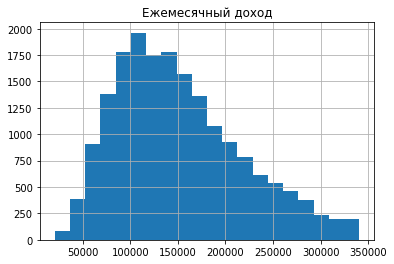

In [13]:
df_total_income['total_income'].hist(bins=20)
plt.title('Ежемесячный доход')

    Заменим пропуски в колонке ['total_income'] на медиану в очищенных данных - 140916 руб./мес.

In [14]:
average_income = 140916
df['total_income'] = df['total_income'].fillna(value=average_income)

    Так как колонка 'days_employed' не нужна при ответе на вопрос, данная колонка будет удалена.
    В ней также присутствовали отрицательные значения, что не может быть корректным.
    Об этом необходимо сообщить коллегам, так как при решении других задач, это колонка
    может понадобиться.

In [15]:
df.drop('days_employed', axis=1, inplace=True)

    Убеждаемся, что таблица больше не содержит пропусков

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 11 columns):
children            21525 non-null int64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null float64
purpose             21525 non-null object
dtypes: float64(1), int64(5), object(5)
memory usage: 1.8+ MB


**Вывод:**

    Причины ошибок в колонках ['days_employed'] и ['total_income']:
    либо технологические ошибки (проблема записи данных), либо человеческий фактор,
    незнание ежемесечного дохода и трудового стажа. Необходимо сообщить комманде для
    выявления причин. Все пропуски были выявлены и устранены.


### 2.3. Замена типов данных <a class="anchor" id="second-3-bullet"></a>

In [17]:
df['total_income'] = df['total_income'].astype('int') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 11 columns):
children            21525 non-null int64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null int64
purpose             21525 non-null object
dtypes: int64(6), object(5)
memory usage: 1.8+ MB


    В столбце ['total_income'] был заменен вещественный тип данных на целочислительнный
    методом astype() . Аргумент ('int') означает, что нужно перевести в целое число.
    При вычислениях будет удобно работать с целыми числами, так как в доходе за месяц копейки
    не будут иметь значения.

### 2.4. Лемматизация<a class="anchor" id="second-4-bullet"></a>

In [18]:
from pymystem3 import Mystem
m = Mystem()
def lemmatizator(i):
    lemmas = m.lemmatize(i)
    return lemmas

df['purpose_lemmas'] = df['purpose'].apply(lemmatizator)
df.head()

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_lemmas
0,1,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,"[покупка, , жилье, \n]"
1,1,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,"[приобретение, , автомобиль, \n]"
2,0,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,"[покупка, , жилье, \n]"
3,3,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,"[дополнительный, , образование, \n]"
4,0,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,"[сыграть, , свадьба, \n]"


    Колонка ['purpose'] не удобна для анализа, так как цели в ней дублируются.
    Цели 'свадьба', 'жилье', 'недвижимость', 'автомобиль', 'образование' написаны разными
    вариантами. В итоге получилось 38 целей вместо 5 шт.
    Сущиствительные написаны в разных падежах, по ним не удобно искать значения и присваивать
    им категории.

    Чтобы провести лемматизацию целей кредита в колонке 'purpose', была написана функция
    def lemmatizator(). Результат лемматизированных значений добавлен в новую колонку
    'purpose_lemmas'. Теперь есть колонка, в которой все существительные написаны в
    именительном падеже и единственном числе, т.е. совпадают по форме.

    Чтобы проверить результат, вывела первые 10 строк

### 2.5. Категоризация данных<a class="anchor" id="second-5-bullet"></a>

    Было произведено исследование данных за 2019г. о категоризации населения России
    в зависимости от уровня доходов в месяц. Было выделено 7 категорий: бедные,
    малообеспеченные, нижний средний класс, средний класс, верхний средний класс,
    состоятельные и богатые. В статистике банка отсутствует категория "бедные",
    поэтому далее используются 6 категорий.

In [19]:
def name_income_level(salary):
    if 20000 < salary < 30000:
        return 'малообеспеченный'
    if 30000 < salary < 50000:
        return 'нижний средний класс'
    if 50000 < salary < 70000:
        return 'средний класс'
    if 70000 < salary < 120000:
        return 'верхний средний класс'
    if 120000 < salary < 150000:
        return 'состоятельный'
    return 'богатый'

#проверка функции для каждой категории
print(name_income_level(25000)) 
print(name_income_level(45000))
print(name_income_level(65000))
print(name_income_level(100000))
print(name_income_level(130000))
print(name_income_level(160000))

малообеспеченный
нижний средний класс
средний класс
верхний средний класс
состоятельный
богатый


    Создана функция name_income_level(), которая в зависимости от дохода в месяц
    присваивает категорию достатка клиента.


In [20]:
df['income_level'] = df['total_income'].apply(name_income_level)
df['income_level'].value_counts()

богатый                  9184
состоятельный            5496
верхний средний класс    5371
средний класс            1102
нижний средний класс      350
малообеспеченный           22
Name: income_level, dtype: int64

Text(0.5, 1.0, 'Категории клиентов по ежемесячным доходам')

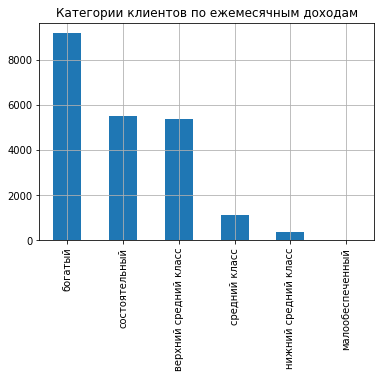

In [21]:
df['income_level'].value_counts(ascending=False).plot(y='income_level', kind='bar', grid=True)
plt.title('Категории клиентов по ежемесячным доходам')

    Результаты работы фунуции name_income_level() добавлены в таблицу, как отдельный столбец.
    Теперь по нему будет удобно группировать. Можно сравнивать клиентов из разных категорий
    по ежемесячным доходам.
    
    Видим, что большинство клиентов банка относится к категории "богатые" с ежемесячным доходом
    от 150 000 руб./мес. ( 9184 шт. клиентов)
    
    На втором месте по численности категория "состоятельных клиентов" с ежемесячным доходом
    от 120 000 руб./мес. до 150 000 руб.мес.( 5496 шт. клиентов)
    
    На третьем месте клиенты, принадлежащие к верхнему среднему классу, с ежемесячным доходом
    от 70000 до 120000 руб./мес. 

**Категоризация целей**

In [22]:
def target_category(purpose_lemmas):
    if 'жилье' in purpose_lemmas:
        return 'жилье'
    elif 'недвижимость' in purpose_lemmas:
        return 'недвижимость'
    elif 'свадьба' in purpose_lemmas:
        return 'свадьба'
    elif 'автомобиль' in purpose_lemmas:
        return 'автомобиль'
    else:
        return 'образование'
df['target_category'] = df['purpose_lemmas'].apply(target_category)


In [23]:
df['target_category'].value_counts()

недвижимость    6367
жилье           4473
автомобиль      4315
образование     4022
свадьба         2348
Name: target_category, dtype: int64

In [24]:
df.head()

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_lemmas,income_level,target_category
0,1,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,"[покупка, , жилье, \n]",богатый,жилье
1,1,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,"[приобретение, , автомобиль, \n]",верхний средний класс,автомобиль
2,0,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,"[покупка, , жилье, \n]",состоятельный,жилье
3,3,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,"[дополнительный, , образование, \n]",богатый,образование
4,0,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,"[сыграть, , свадьба, \n]",богатый,свадьба


* Для категоризации целей была написана функция, которая ищет цели в списке лемм.
* Результат работы функции target_category() добавлен как отдельный столбец
* самая частая цель кредита - недвижимость
        
    

Text(0.5, 1.0, 'Цель кредита')

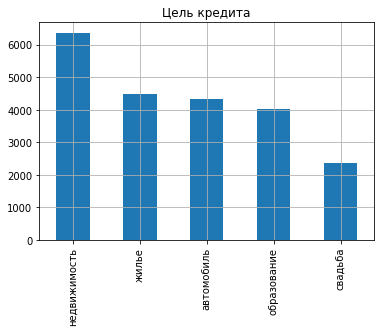

In [25]:
df['target_category'].value_counts(ascending=False).plot(y='target_category', kind='bar', grid=True)
plt.title('Цель кредита')

    Для ответа на поставленные вопросы понадобилось выделить определенные категории.
    Первая категория - по уровню дохода, вторая категория по видам целей.

### Шаг 3. Иследовательский анализ данных <a class="anchor" id="third-bullet"></a>

### 3.1. Есть ли зависимость между наличием детей и возвратом кредита в срок?<a class="anchor" id="third-1-bullet"></a>

In [26]:
df['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

В колонке ['children'] были обнаружены не корректные данные:
* -1 ребенок у 47 человек  и 20 детей у 76 человек.
* Вероятнее всего имеется в виду 1 ребенок и 2 ребенка, таким образом это дубликаты.
* Необходимо заменить неверные значения на верные.

In [27]:
df['children'] = df['children'].replace(-1, 1)
df['children'] = df['children'].replace(20, 2)
df['children'].value_counts()

0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

In [28]:
children = df.pivot_table(index= 'children', values= 'debt', aggfunc= ['count', 'sum', 'mean']).reset_index()
children.columns = ['children', 'quantity_clients', 'quantity_debtors', 'ratio']
children

,children,quantity_clients,quantity_debtors,ratio
0,0,14149,1063,0.075129
1,1,4865,445,0.091470
2,2,2131,202,0.094791
3,3,330,27,0.081818
4,4,41,4,0.097561
5,5,9,0,0.000000


Text(0.5, 1.0, 'Зависимость между наличием детей и просрочки платежей')

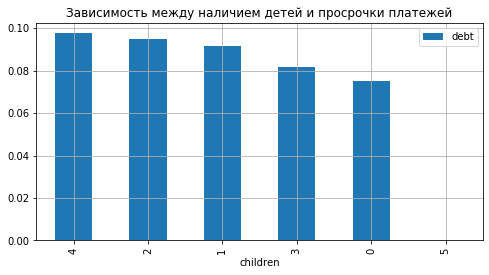

In [29]:
df.pivot_table(index='children', values='debt', aggfunc='mean').sort_values(by='debt', ascending=False).plot(kind='bar', grid=True, figsize=(8, 4))
plt.title('Зависимость между наличием детей и просрочкой платежа')

    У клиентов банка, имеющих 5 детей, нет задержек с возвратом кредита. Но они составляют всего 0,04%
    от общего числа клиентов. Поэтому делать вывод, что, чем больше детей в семье, тем ниже риск задержки
    оплаты кредита, было бы ошибочно.(малочисленная группа, статистика может быть не верной)

    На втором месте клиенты, у которых нет детей (0,075). Это самая большая группа клиентов (65,73% от
    общего числа). Таким образом, клиенты, у которых нет детей, чаще всех берут кредиты и реже всех 
    задерживают выплаты.

    Клиенты, у которых от 1 до 4 детей показывают близкие результаты: от 0,098 до 0,082.


    Посмотрим на коэффициент Пирсона. Как в целом фактор наличия детей влияет
    на просрочку платежей.

In [30]:
df['children'].corr(df['debt'])

0.024989833706762547

    Чем ближе коэффициент Пирсона к значению 1, тем сильнее взамосвязь.
    В данном случае есть небольшая положительная корреляция (коэф. - 0,25).

### 3.2. Есть ли зависимость между семейным положением и возвратом кредита в срок?<a class="anchor" id="third-2-bullet"></a>


In [31]:
family_status = df.pivot_table(index= 'family_status', values= 'debt', aggfunc= ['count', 'sum', 'mean']).reset_index()
family_status.columns = ['family_status', 'quantity_clients', 'quantity_debtors', 'ratio']
family_status

,family_status,quantity_clients,quantity_debtors,ratio
0,Не женат / не замужем,2813,274,0.097405
1,в разводе,1195,85,0.071130
2,вдовец / вдова,960,63,0.065625
3,гражданский брак,4177,388,0.092890
4,женат / замужем,12380,931,0.075202


Text(0.5, 1.0, 'Зависимость между семейным положением и просрочкой платежа')

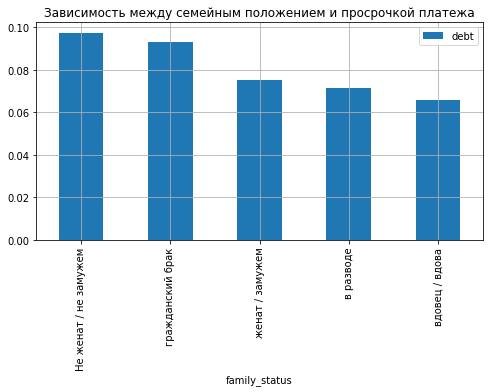

In [38]:
df.pivot_table(index= 'family_status', values= 'debt', aggfunc='mean').sort_values(by='debt', ascending=False).plot(kind='bar', grid=True, figsize=(8, 4))
plt.title('Зависимость между семейным положением и просрочкой платежа')

- Чаще всего задерживают оплаты по кредиту клиенты, которые не женаты / не замужем.
- Реже всего задерживают кредиты клиенты с семейным положением вдовец / вдова.

Обе группы клиентов относятся к одиноким. Для нахождения зависимости расширим группы до одинокие / не одинокие (брак или гражданский брак).

In [39]:
def target_family_status(family_status):
    if 'Не женат / не замужем' in family_status:
        return 'одинокий'
    elif 'в разводе' in family_status:
        return 'одинокий'
    elif 'вдовец / вдова' in family_status:
        return 'одинокий'
    elif 'гражданский брак' in family_status:
        return 'не одинокий'
    else:
        return 'не одинокий'
df['target_family_status'] = df['family_status'].apply(target_family_status)

In [40]:
family_status_cor = df.pivot_table(index= 'target_family_status', values= 'debt', aggfunc= ['count', 'sum', 'mean']).reset_index()
family_status_cor.columns = ['family_status', 'quantity_clients', 'quantity_debtors', 'ratio']
family_status_cor

,family_status,quantity_clients,quantity_debtors,ratio
0,не одинокий,16557,1319,0.079664
1,одинокий,4968,422,0.084944


Text(0.5, 1.0, 'Зависимость между семейным положением и просрочкой платежа')

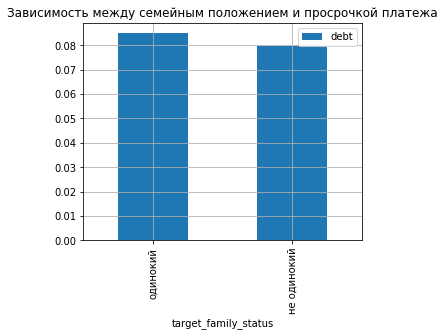

In [43]:
df.pivot_table(index= 'target_family_status', values= 'debt', aggfunc='mean').sort_values(by='debt', ascending=False).plot(kind='bar', grid=True, figsize=(5, 4))
plt.title('Зависимость между семейным положением и просрочкой платежа')

    При объединении нескольких групп в две большие группы (одинокие / не одинокие) оказалось,
    что люди состоящие в браке или в гражданском браке  реже нарушают сроки по оплате кредита.
    
    Также люди, состоящие в браке / гражанском браке чаще берут кредиты, по сравнению с одинокими людьми.



### 3.3. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?<a class="anchor" id="third-3-bullet"></a>

In [46]:
income_level = df.pivot_table(index= 'income_level', values= 'debt', aggfunc= ['count', 'sum', 'mean']).reset_index()
income_level.columns = ['income_level', 'quantity_clients', 'quantity_debtors', 'ratio']
income_level

,income_level,quantity_clients,quantity_debtors,ratio
0,богатый,9184,726,0.079051
1,верхний средний класс,5371,450,0.083783
2,малообеспеченный,22,2,0.090909
3,нижний средний класс,350,21,0.060000
4,состоятельный,5496,464,0.084425
5,средний класс,1102,78,0.070780


Text(0.5, 1.0, 'Зависимость между уровнем дохода и просрочкой платежа')

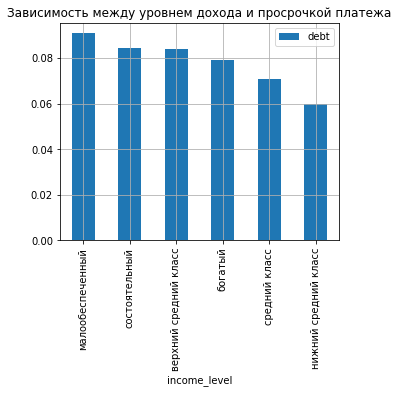

In [47]:
df.pivot_table(index= 'income_level', values= 'debt', aggfunc='mean').sort_values(by='debt', ascending=False).plot(kind='bar', grid=True, figsize=(5, 4))
plt.title('Зависимость между уровнем дохода и просрочкой платежа')

    Клиенты,относящиеся к нижнему среднему классу ( 50 - 70 тыс.руб. в мес) реже остальных нарушают сроки оплаты кредита.
    
    На втором месте клиенты, относящиеся к среднему классу (70 - 120 тыс.руб. в мес)

    Клиенты, относящиеся к малообеспеченным (20 - 30 тыс.руб. в мес), чаще остальных нарушают сроки оплаты кредита.

### 3.4. Как разные цели кредита влияют на его возврат в срок?<a class="anchor" id="third-4-bullet"></a>

In [49]:
target_category = df.pivot_table(index= 'target_category', values= 'debt', aggfunc= ['count', 'sum', 'mean']).reset_index()
target_category.columns = ['target_category', 'quantity_clients', 'quantity_debtors', 'ratio']
target_category

,target_category,quantity_clients,quantity_debtors,ratio
0,автомобиль,4315,403,0.093395
1,жилье,4473,308,0.068858
2,недвижимость,6367,474,0.074446
3,образование,4022,370,0.091994
4,свадьба,2348,186,0.079216


Text(0.5, 1.0, 'Зависимость между целями кредита и просрочкой платежа')

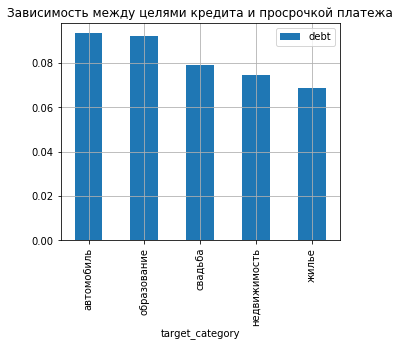

In [50]:
df.pivot_table(index= 'target_category', values= 'debt', aggfunc='mean').sort_values(by='debt', ascending=False).plot(kind='bar', grid=True, figsize=(5, 4))
plt.title('Зависимость между целями кредита и просрочкой платежа')

    Клиенты, берущие кредит на автомобиль и образование, чаще нарашают срок оплаты.

    Клиенты, берущие кредит на жилье, реже остальных нарушают срок оплаты

### Шаг 4. Общий вывод <a class="anchor" id="thourth-bullet"></a>

При анализе статистики банка о платежеспособности клиентов, были получены следующие результата:

1. Клиенты, у которых нет детей, чаще всех берут кредиты и реже всех задерживают выплаты

2. Клиенты состоящие в браке или в гражданском браке чаще всех берут кредиты и  реже остальных нарушают сроки по оплате кредита. 

3. Клиенты,относящиеся к нижнему среднему классу ( 50 - 70 тыс.руб. в мес) реже остальных нарушают сроки оплаты кредита.
Клиенты, относящиеся к малообеспеченным (20 - 30 тыс.руб. в мес), чаще остальных нарушают сроки оплаты кредита.

4. Клиенты, берущие кредит на автомобиль и образование, чаще нарашают срок оплаты.
Клиенты, берущие кредит на жилье, реже остальных нарушают срок оплаты
